### Initialization

In [24]:
# Standard imports
import pandas as pd
import sys 
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import numpy as np
# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 


sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

# Define study
STUDY_NAME = "opt_flathv_75_1500_withBB_chroma15_eol_bbb_2228"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/base_collider/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/base_collider/xtrack_0004/config.yaml"

SAVE_STUDY_EOS = False


### Load data

In [2]:
# Load dataframe
df = pd.read_parquet(PARQUET_PATH)

# Round all numbers to 3 decimals
df = df.round(3)
df

normalized amplitude in xy-plane      qx     qy  i_bunch_b1  \
beam  i_bunch_b1                                                                
lhcb1 0                                      7.406  62.313  60.32         0.0   
      1                                      7.031  62.313  60.32         1.0   
      2                                      6.875  62.313  60.32         2.0   
      3                                      7.125  62.313  60.32         3.0   
      4                                      6.531  62.313  60.32         4.0   
...                                            ...     ...    ...         ...   
      3066                                   5.594  62.313  60.32      3066.0   
      3067                                   6.406  62.313  60.32      3067.0   
      3068                                   6.188  62.313  60.32      3068.0   
      3430                                   6.188  62.313  60.32      3430.0   
      3431                                   6.562  62.313  60.32      3431.0   

                  i_bunch_b2  num_particles_per_bunch  
beam  i_bunch_b1                                       
lhcb1 0                  0.0             1.316653e+11  
      1                  1.0             1.316653e+11  
      2                  2.0             1.316653e+11  
      3                  3.0             1.316653e+11  
      4                  4.0             1.316653e+11  
...                      ...                      ...  
      3066            3066.0             1.316653e+11  
      3067            3067.0             1.316653e+11  
      3068            3068.0             1.316653e+11  
      3430            3430.0             1.316653e+11  
      3431            3431.0             1.316653e+11  

[574 rows x 6 columns]

In [3]:
# Get the list of bunch families
fname = "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/master_jobs/filling_scheme/25ns_2228b_2216_1686_2112_hybrid_8b4e_2x56b_25ns_3x48b_12inj_with_identical_bunches.json"
with open(fname, "r") as fid:
    filling = json.load(fid)
l_families = filling["beam1_identical_bunches"]
dic_identical_bunches = {}
for family in l_families:
    dic_identical_bunches[family[0]] = family[1:]

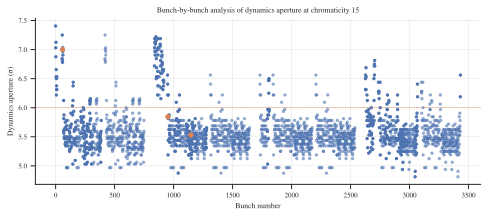

In [69]:
fig = plt.figure(figsize=(8, 3))

plt.plot(df["i_bunch_b1"], df["normalized amplitude in xy-plane"], ".")
for bunch, DA in zip(df["i_bunch_b1"], df["normalized amplitude in xy-plane"]):
    if bunch in dic_identical_bunches and len(dic_identical_bunches[bunch]) > 0:
        plt.plot(dic_identical_bunches[bunch], [DA]*len(dic_identical_bunches[bunch]), ".", color = "C0", alpha = 0.5)
    else:
        pass
plt.axhline(6, color = "C1", linestyle = "--")
plt.scatter(x = [1147], y = df[df["i_bunch_b1"]==1147]["normalized amplitude in xy-plane"].values, color = "C1", s = 20, zorder= 10)
plt.scatter(x = [58], y = df[df["i_bunch_b1"]==58]["normalized amplitude in xy-plane"].values, color = "C1", s = 20, zorder= 10)
plt.scatter(x = [952], y = df[df["i_bunch_b1"]==952]["normalized amplitude in xy-plane"].values, color = "C1", s = 20, zorder= 10)

#analysis_functions.add_QR_code(fig, "https://cernbox.cern.ch/s/CwDVLUpLRwCQF0S")
plt.grid()
plt.xlabel("Bunch number")
plt.ylabel(r"Dynamics aperture ($\sigma$)")
plt.title("Bunch-by-bunch analysis of dynamics aperture at chromaticity 15")
plt.savefig("DA_bbb_15.pdf", bbox_inches='tight')
plt.show()

In [14]:
df[df["i_bunch_b1"]==950]["normalized amplitude in xy-plane"].values

array([6.406])

### Save study on EOS

In [ ]:
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME, type_analysis="bbb")
    # analysis_functions.archive_and_clean(path_archive, path_EOS)

#### Study bunch and chroma

In [72]:
import fillingpatterns as fp
filling_scheme_path = '/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/master_jobs/filling_scheme/25ns_2228b_2216_1686_2112_hybrid_8b4e_2x56b_25ns_3x48b_12inj.json'
patt = fp.FillingPattern.from_json(filling_scheme_path)
patt.compute_beam_beam_schedule(n_lr_per_side=24)

sched_b1 = patt.b1.bb_schedule

Computing collision schedules...
Done Beam 1
Done Beam 2


In [73]:
# Convert columns to tuples first
# sched_b1['Positions in ALICE'] = sched_b1['Positions in ALICE'].apply(lambda x: tuple(np.array(x/3, dtype = np.int32)*3))
# sched_b1['Positions in ATLAS/CMS'] = sched_b1['Positions in ATLAS/CMS'].apply(lambda x: tuple(np.array(x/3, dtype = np.int32)*3))
# sched_b1['Positions in LHCB'] = sched_b1['Positions in LHCB'].apply(lambda x: tuple(np.array(x/3, dtype = np.int32)*3))

# Beam 1
sched_b1['Positions in ALICE'] = sched_b1['Positions in ALICE'].apply(tuple)
sched_b1['Positions in ATLAS/CMS'] = sched_b1['Positions in ATLAS/CMS'].apply(tuple)
sched_b1['Positions in LHCB'] = sched_b1['Positions in LHCB'].apply(tuple)


In [74]:
# Find all bunches with the same schedule
b1_grouped = sched_b1.groupby(['# of LR in ALICE', 'Positions in ALICE', '# of LR in ATLAS/CMS', 'Positions in ATLAS/CMS', 'collides in ATLAS/CMS', 'collides in ALICE'])

# Convert to list
# Each list contains a tuple with :
#  - element 0 is the identical properties
#  - element 1 are the schedules of the identical bunches
l_b1_grouped = list(b1_grouped)


In [75]:
# Browse bunch families
l_c = []
for group in l_b1_grouped:
    # Look for families with at least 2 bunches
    if group[1].shape[0] > 1:
        # Check if at least one of the bunches in the family is different from the others reagrding collision in LHCB
        l_index = group[1].index.to_list()
        #print("NEW")
        for bunch_index in l_index[1:]:
            #print(sched_b1.loc[bunch_index, 'collides in LHCB'])
            if sched_b1.loc[bunch_index, 'collides in LHCB'] != sched_b1.loc[l_index[0], 'collides in LHCB']:
                if abs(sched_b1.loc[bunch_index, '# of LR in LHCB'] - sched_b1.loc[l_index[0], '# of LR in LHCB']) <= 10:
                    print(l_index[0], bunch_index)
                    #print(sched_b1.loc[l_index[0]])
                    #print(sched_b1.loc[bunch_index])
                    if sched_b1.loc[bunch_index, 'collides in LHCB'] == True:
                        l_c.append([l_index[0], bunch_index])
                    else:
                        l_c.append([bunch_index, l_index[0]])
                    break

58 952
57 951
56 950
55 949
59 953
60 954
61 955
62 956
147 1041
148 1042
149 1043
234 1128
235 1129
236 1130
237 1131
238 1132
239 1133
240 1134
289 1183
290 1184
291 1185
292 1186
293 1187
294 1188
295 1189


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


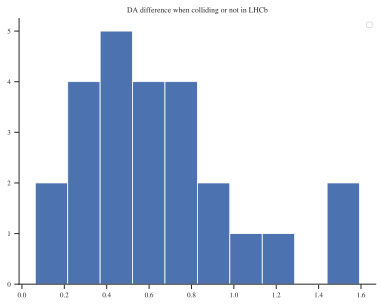

In [76]:
array_c = np.array(l_c)

# DA_distr of bunch with collisions
DA_no_coll = df[df['i_bunch_b1'].isin(array_c[:,0])]['normalized amplitude in xy-plane'].to_numpy()
DA_coll = df[df['i_bunch_b1'].isin(array_c[:,1])]['normalized amplitude in xy-plane'].to_numpy()
# Plot both distributions if collision in LHCB or not
plt.hist(DA_no_coll - DA_coll)
plt.legend()
plt.title("DA difference when colliding or not in LHCb")
plt.show()

In [77]:
DA_no_coll - DA_coll

array([0.282, 0.844, 0.593, 1.156, 1.593, 1.593, 0.75 , 1.094, 0.687,
       0.625, 0.782, 0.406, 0.281, 0.656, 0.063, 0.5  , 0.124, 0.469,
       0.313, 0.437, 0.5  , 0.719, 0.25 , 0.656, 0.906])

In [78]:
df[df['i_bunch_b1'].isin(array_c[:,0])]

normalized amplitude in xy-plane      qx     qy  i_bunch_b1  \
beam  i_bunch_b1                                                                
lhcb1 55                                     6.844  62.313  60.32        55.0   
      56                                     7.250  62.313  60.32        56.0   
      57                                     6.812  62.313  60.32        57.0   
      58                                     7.000  62.313  60.32        58.0   
      59                                     6.781  62.313  60.32        59.0   
      60                                     7.031  62.313  60.32        60.0   
      61                                     6.969  62.313  60.32        61.0   
      62                                     6.906  62.313  60.32        62.0   
      147                                    6.125  62.313  60.32       147.0   
      148                                    6.375  62.313  60.32       148.0   
      149                                    6.438  62.313  60.32       149.0   
      234                                    6.000  62.313  60.32       234.0   
      235                                    5.750  62.313  60.32       235.0   
      236                                    5.844  62.313  60.32       236.0   
      237                                    5.844  62.313  60.32       237.0   
      238                                    5.688  62.313  60.32       238.0   
      239                                    5.562  62.313  60.32       239.0   
      240                                    5.969  62.313  60.32       240.0   
      289                                    6.125  62.313  60.32       289.0   
      290                                    5.906  62.313  60.32       290.0   
      291                                    6.062  62.313  60.32       291.0   
      292                                    6.094  62.313  60.32       292.0   
      293                                    5.781  62.313  60.32       293.0   
      294                                    6.125  62.313  60.32       294.0   
      295                                    6.156  62.313  60.32       295.0   

                  i_bunch_b2  num_particles_per_bunch  
beam  i_bunch_b1                                       
lhcb1 55                55.0             1.316653e+11  
      56                56.0             1.316653e+11  
      57                57.0             1.316653e+11  
      58                58.0             1.316653e+11  
      59                59.0             1.316653e+11  
      60                60.0             1.316653e+11  
      61                61.0             1.316653e+11  
      62                62.0             1.316653e+11  
      147              147.0             1.316653e+11  
      148              148.0             1.316653e+11  
      149              149.0             1.316653e+11  
      234              234.0             1.316653e+11  
      235              235.0             1.316653e+11  
      236              236.0             1.316653e+11  
      237              237.0             1.316653e+11  
      238              238.0             1.316653e+11  
      239              239.0             1.316653e+11  
      240              240.0             1.316653e+11  
      289              289.0             1.316653e+11  
      290              290.0             1.316653e+11  
      291              291.0             1.316653e+11  
      292              292.0             1.316653e+11  
      293              293.0             1.316653e+11  
      294              294.0             1.316653e+11  
      295              295.0             1.316653e+11

In [79]:
df[df['i_bunch_b1'].isin(array_c[:,1])]

normalized amplitude in xy-plane      qx     qy  i_bunch_b1  \
beam  i_bunch_b1                                                                
lhcb1 949                                    6.562  62.313  60.32       949.0   
      950                                    6.406  62.313  60.32       950.0   
      951                                    6.219  62.313  60.32       951.0   
      952                                    5.844  62.313  60.32       952.0   
      953                                    5.188  62.313  60.32       953.0   
      954                                    5.438  62.313  60.32       954.0   
      955                                    6.219  62.313  60.32       955.0   
      956                                    5.812  62.313  60.32       956.0   
      1041                                   5.438  62.313  60.32      1041.0   
      1042                                   5.750  62.313  60.32      1042.0   
      1043                                   5.656  62.313  60.32      1043.0   
      1128                                   5.594  62.313  60.32      1128.0   
      1129                                   5.469  62.313  60.32      1129.0   
      1130                                   5.188  62.313  60.32      1130.0   
      1131                                   5.781  62.313  60.32      1131.0   
      1132                                   5.188  62.313  60.32      1132.0   
      1133                                   5.438  62.313  60.32      1133.0   
      1134                                   5.500  62.313  60.32      1134.0   
      1183                                   5.812  62.313  60.32      1183.0   
      1184                                   5.469  62.313  60.32      1184.0   
      1185                                   5.562  62.313  60.32      1185.0   
      1186                                   5.375  62.313  60.32      1186.0   
      1187                                   5.531  62.313  60.32      1187.0   
      1188                                   5.469  62.313  60.32      1188.0   
      1189                                   5.250  62.313  60.32      1189.0   

                  i_bunch_b2  num_particles_per_bunch  
beam  i_bunch_b1                                       
lhcb1 949              949.0             1.316653e+11  
      950              950.0             1.316653e+11  
      951              951.0             1.316653e+11  
      952              952.0             1.316653e+11  
      953              953.0             1.316653e+11  
      954              954.0             1.316653e+11  
      955              955.0             1.316653e+11  
      956              956.0             1.316653e+11  
      1041            1041.0             1.316653e+11  
      1042            1042.0             1.316653e+11  
      1043            1043.0             1.316653e+11  
      1128            1128.0             1.316653e+11  
      1129            1129.0             1.316653e+11  
      1130            1130.0             1.316653e+11  
      1131            1131.0             1.316653e+11  
      1132            1132.0             1.316653e+11  
      1133            1133.0             1.316653e+11  
      1134            1134.0             1.316653e+11  
      1183            1183.0             1.316653e+11  
      1184            1184.0             1.316653e+11  
      1185            1185.0             1.316653e+11  
      1186            1186.0             1.316653e+11  
      1187            1187.0             1.316653e+11  
      1188            1188.0             1.316653e+11  
      1189            1189.0             1.316653e+11

In [80]:
len(array_c[:,0])

25